### **Proyecto Data Science (Delitos 2021) - Data Wrangling**


### Presentacion del Dataset (Delitos 2021)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

df_delito = pd.read_csv('delitos_2021.csv', sep=";")

df_delito.head()


,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,HC-2021-1008202,2021,Enero,Miércoles,06/01/2021,18,Homicidio,Siniestro Vial,NaN,Constitución,1.0,"-34,62761","-58,379146",1
1,HC-2021-1009094,2021,Enero,Jueves,07/01/2021,10,Homicidio,Siniestro Vial,NaN,Mataderos,9.0,"-34,64972969","-58,51058958",1
2,HC-2021-1013236,2021,Enero,Domingo,10/01/2021,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7.0,"-34,62917196","-58,43058079",1
3,HC-2021-1014154,2021,Enero,Lunes,11/01/2021,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5.0,"-34,63867577","-58,4145554",1
4,HC-2021-1015476,2021,Enero,Lunes,11/01/2021,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9.0,"-34,64771436","-58,46806552",1



###  Muestra de cantidad de registros y columnas

In [2]:
df_delito.shape

(88567, 14)

### Muestra Info de Columnas y Filas

In [3]:
df_delito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88567 entries, 0 to 88566
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id-mapa    88567 non-null  object 
 1   anio       88567 non-null  int64  
 2   mes        88567 non-null  object 
 3   dia        88567 non-null  object 
 4   fecha      88567 non-null  object 
 5   franja     88567 non-null  object 
 6   tipo       88567 non-null  object 
 7   subtipo    16321 non-null  object 
 8   uso_armas  8472 non-null   object 
 9   barrio     87390 non-null  object 
 10  comuna     87907 non-null  float64
 11  latitud    88567 non-null  object 
 12  longitud   88567 non-null  object 
 13  cantidad   88567 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 9.5+ MB



### Muestra de Valores y tipo de datos


In [4]:
df_delito.dtypes

id-mapa       object
anio           int64
mes           object
dia           object
fecha         object
franja        object
tipo          object
subtipo       object
uso_armas     object
barrio        object
comuna       float64
latitud       object
longitud      object
cantidad       int64
dtype: object

### Verificación de Nulos

In [5]:
df_delito.isnull().sum()

id-mapa          0
anio             0
mes              0
dia              0
fecha            0
franja           0
tipo             0
subtipo      72246
uso_armas    80095
barrio        1177
comuna         660
latitud          0
longitud         0
cantidad         0
dtype: int64

### Verificación de Duplicados

In [6]:
df_delito.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88562    False
88563    False
88564    False
88565    False
88566    False
Length: 88567, dtype: bool

### Muestra Cantidad de Duplicados

In [7]:
df_delito.duplicated().sum()

1

### Borrar Duplicados

In [4]:
print(df_delito.shape)
df_delito1 = df_delito.drop_duplicates()
print(df_delito1.shape)
print(df_delito1)

(88567, 14)
(88566, 14)
               id-mapa  anio      mes        dia       fecha franja  \
0      HC-2021-1008202  2021    Enero  Miércoles  06/01/2021     18   
1      HC-2021-1009094  2021    Enero     Jueves  07/01/2021     10   
2      HC-2021-1013236  2021    Enero    Domingo  10/01/2021      7   
3      HC-2021-1014154  2021    Enero      Lunes  11/01/2021      9   
4      HC-2021-1015476  2021    Enero      Lunes  11/01/2021     21   
...                ...   ...      ...        ...         ...    ...   
88562  RH-2021-3751758  2021     Mayo     Sábado  08/05/2021     10   
88563  RH-2021-3768141  2021    Junio     Martes  29/06/2021     21   
88564  RH-2021-3768589  2021    Junio  Miércoles  30/06/2021     13   
88565  RH-2021-3783716  2021    Julio     Sábado  31/07/2021      1   
88566  RH-2021-3807019  2021  Octubre  Miércoles  06/10/2021     14   

                        tipo         subtipo uso_armas             barrio  \
0                  Homicidio  Siniestro Vial  

### Analisis de Nulos

#### Porcentaje de Nulos

In [5]:
pd.set_option('display.max_rows', None)  # or 1000
serie=(df_delito1.isnull().sum()/df_delito1.shape[0])*100
serie=serie.sort_values(ascending=False)
serie

uso_armas    90.434252
subtipo      81.571935
barrio        1.328952
comuna        0.745207
id-mapa       0.000000
anio          0.000000
mes           0.000000
dia           0.000000
fecha         0.000000
franja        0.000000
tipo          0.000000
latitud       0.000000
longitud      0.000000
cantidad      0.000000
dtype: float64

#### Grafico de los Nulos

<AxesSubplot:>

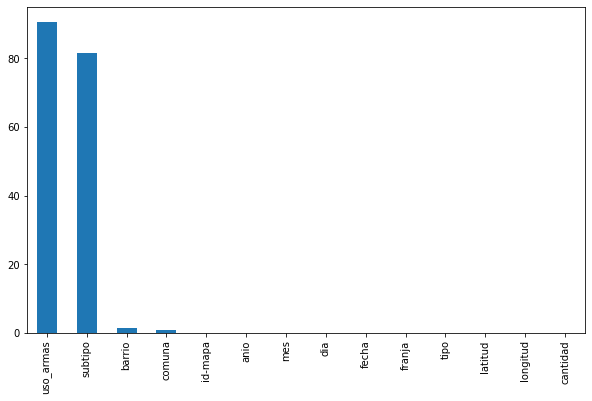

In [6]:
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [14]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

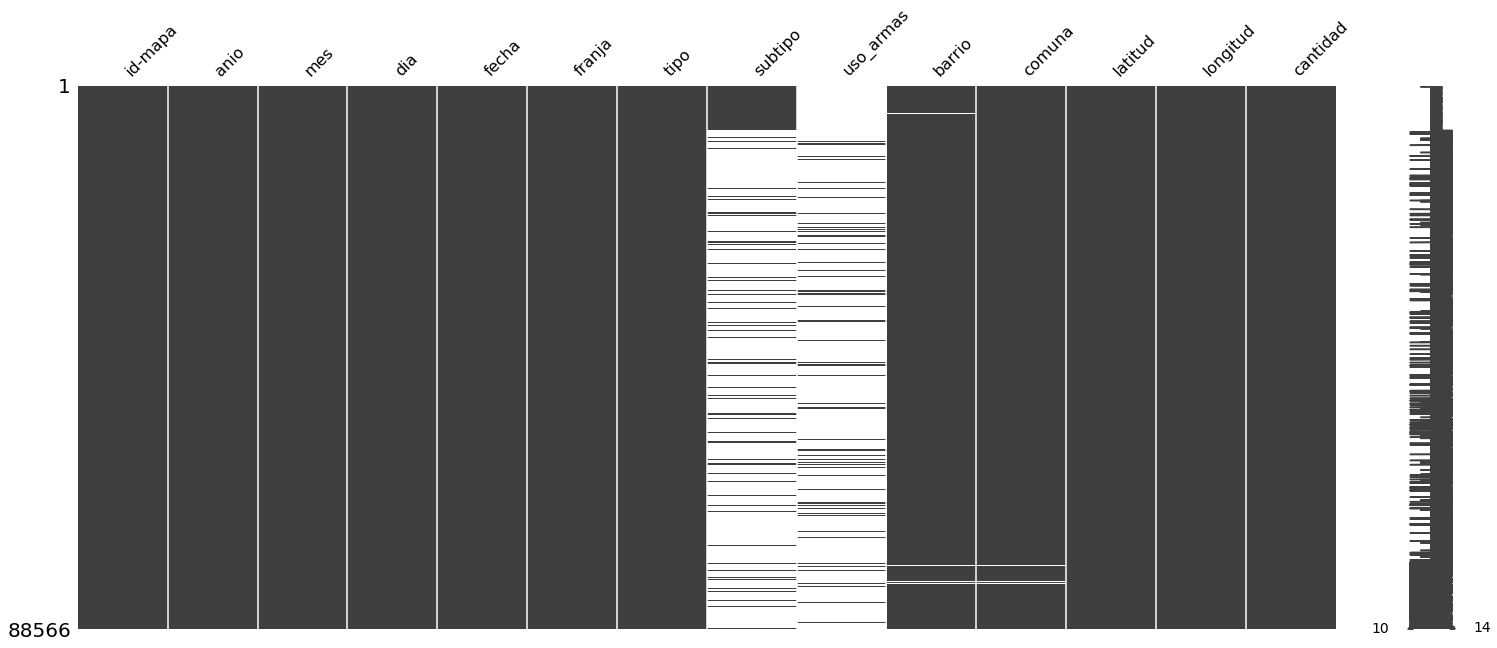

In [7]:
import missingno as msno
msno.matrix(df_delito1)

<AxesSubplot:>

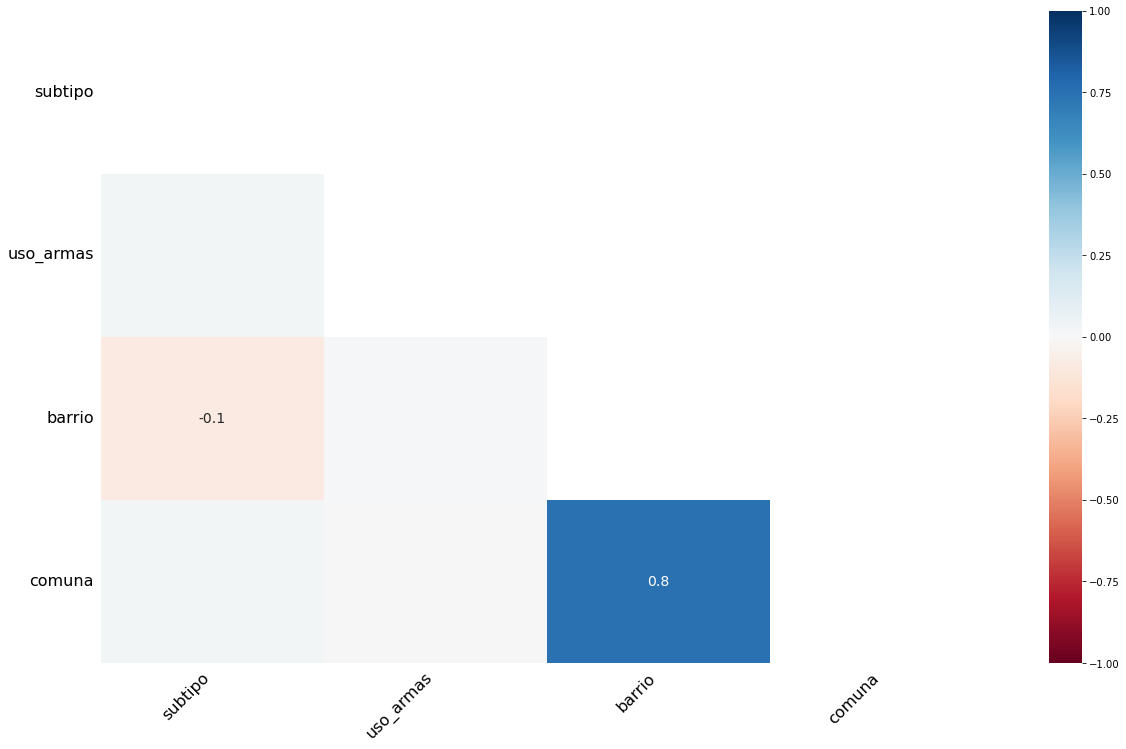

In [19]:
msno.heatmap(df_delito1)

### Borrar de Columnas Innecesarias

In [8]:
borrado_columna=['uso_armas','subtipo','id-mapa','comuna','latitud','longitud']
df_delito1_x=df_delito1.drop(labels=borrado_columna, axis=1)
df_delito1_x.columns 

Index(['anio', 'mes', 'dia', 'fecha', 'franja', 'tipo', 'barrio', 'cantidad'], dtype='object')

#### Verificar sin quedaron Nulos

In [10]:
df_delito1_x.isnull().sum()

anio           0
mes            0
dia            0
fecha          0
franja         0
tipo           0
barrio      1177
cantidad       0
dtype: int64

#### Reemplazar los datos nulos por dato (Desconocido)

In [11]:
categoria_r =['barrio']
for i in categoria_r:
   df_delito1_x[i] = df_delito1_x[i].fillna('Desconocido')

#### Verificar si quedaron datos nulos

In [12]:
df_delito1_x.isnull().sum()

anio        0
mes         0
dia         0
fecha       0
franja      0
tipo        0
barrio      0
cantidad    0
dtype: int64

#### Verificacion del DataSet

In [14]:
df_delito1_x.head()

,anio,mes,dia,fecha,franja,tipo,barrio,cantidad
0,2021,Enero,Miércoles,06/01/2021,18,Homicidio,Constitución,1
1,2021,Enero,Jueves,07/01/2021,10,Homicidio,Mataderos,1
2,2021,Enero,Domingo,10/01/2021,7,Homicidio,Parque Chacabuco,1
3,2021,Enero,Lunes,11/01/2021,9,Homicidio,Nueva Pompeya,1
4,2021,Enero,Lunes,11/01/2021,21,Homicidio,Parque Avellaneda,1
